In [7]:
import pandas as pd


In [8]:
dataset= pd.read_excel("D:\Study\Machine Learning\FunctionTransformer\dataset1.xlsx")

In [9]:
dataset

,type,Urgency,severity,priority
0,Task,low,minor,4.0
1,Task,NaN,minor,4.0
2,Task,low,minor,NaN
3,Task,low,NaN,4.0
4,Task,NaN,minor,4.0
...,...,...,...,...
485,Task,low,minor,4.0
486,Task,low,minor,4.0
487,Bug,low,minor,4.0
488,Bug,low,minor,4.0


In [10]:
dataset=dataset.dropna()

In [11]:
dataset

,type,Urgency,severity,priority
0,Task,low,minor,4.0
5,Task,low,minor,4.0
8,Task,low,minor,4.0
9,Task,low,minor,4.0
10,Task,low,minor,4.0
...,...,...,...,...
485,Task,low,minor,4.0
486,Task,low,minor,4.0
487,Bug,low,minor,4.0
488,Bug,low,minor,4.0


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 462 entries, 0 to 489
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   type      462 non-null    object 
 1   Urgency   462 non-null    object 
 2   severity  462 non-null    object 
 3   priority  462 non-null    float64
dtypes: float64(1), object(3)
memory usage: 18.0+ KB


In [14]:
dataset.describe()

,priority
count,462.000000
mean,3548.841991
std,14320.941041
min,1.000000
25%,1.000000
50%,4.000000
75%,4.000000
max,87555.000000


C:\Users\Javairia\AppData\Local\Temp\ipykernel_5736\4075147804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["priority"])


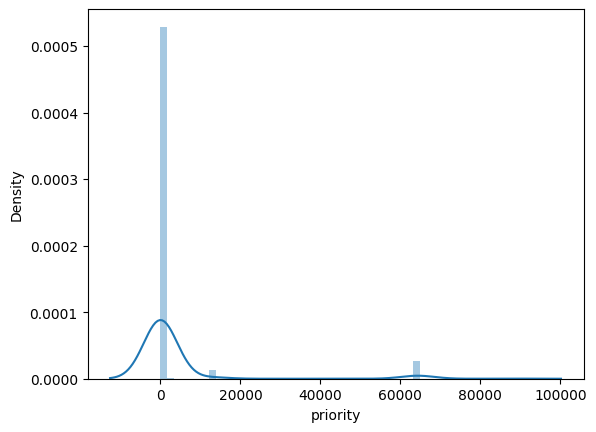

In [15]:
sns.distplot(dataset["priority"])
plt.show()

In [16]:
q1=dataset["priority"].quantile(0.25)

In [17]:
q3=dataset["priority"].quantile(0.75)
iqr=q3-q1

In [18]:
min_value=q1-(1.5*iqr)
max_value=q3+(1.5*iqr)

In [19]:
min_value,max_value

(-3.5, 8.5)

In [20]:
dataset=dataset[dataset["priority"]<=max_value]

C:\Users\Javairia\AppData\Local\Temp\ipykernel_5736\4075147804.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["priority"])


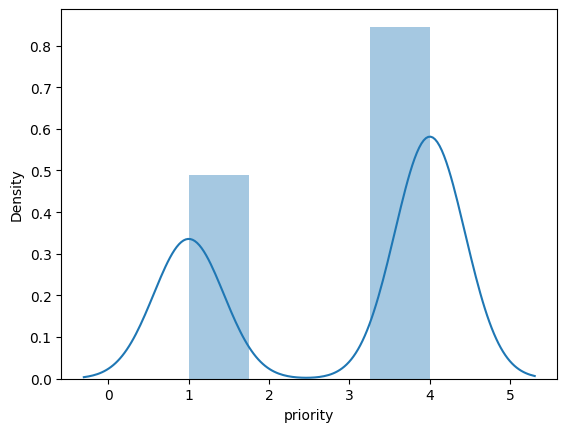

In [21]:
sns.distplot(dataset["priority"])
plt.show()

In [23]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [25]:
ft=FunctionTransformer(func=np.log1p)
dataset["priority_transformed"]=ft.fit_transform(dataset[["priority"]])

C:\Users\Javairia\AppData\Local\Temp\ipykernel_5736\2581098144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["priority_transformed"]=ft.fit_transform(dataset[["priority"]])


C:\Users\Javairia\AppData\Local\Temp\ipykernel_5736\2996334370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["priority"])
C:\Users\Javairia\AppData\Local\Temp\ipykernel_5736\2996334370.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["priority_transformed"])


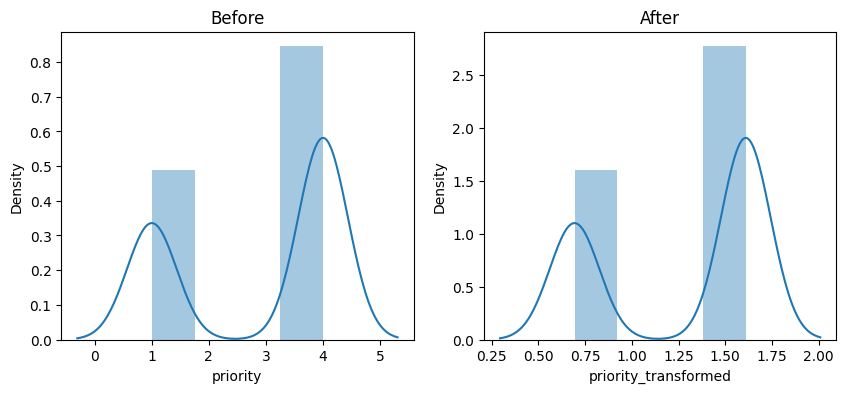

In [30]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(dataset["priority"])
plt.title("Before")
plt.subplot(1,2,2)
sns.distplot(dataset["priority_transformed"])
plt.title("After")
plt.show()